<a href="https://colab.research.google.com/github/Shah-king/AI-Trendspotter/blob/main/notebooks/US_Notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis (EDA) Plan for YouTube Trending Dataset
This notebook will guide through a structured EDA process for the YouTube trending dataset. The main steps include:
1. **Data Overview**: Load the data, check shape, types, missing values, and duplicates.
2. **Feature Understanding**: Review columns, unique values, and data types.
3. **Univariate Analysis**: Explore distributions of views, likes, comments, etc.
4. **Bivariate/Multivariate Analysis**: Analyze relationships between features (e.g., views vs. likes).
5. **Temporal Analysis**: Explore trends by publish time, trending time, etc.
6. **Text Analysis**: Analyze titles, tags, and descriptions for patterns.
7. **Outlier Detection**: Identify videos with extreme values.
8. **Summary**: Capture key findings and insights.

In [25]:
# Data Overview and Centralized Data Cleaning for the YouTube Trending Dataset
import pandas as pd

# Load the dataset
youtube_data = pd.read_csv('../Datasets/US_youtube_trending_data.csv')

# --- CENTRALIZED DATA CLEANING --- #
# Remove duplicate rows
youtube_data_clean = youtube_data.drop_duplicates().copy()
# Fill missing values in 'description' with an empty string (most relevant missing col)
if 'description' in youtube_data_clean.columns:
    youtube_data_clean['description'] = youtube_data_clean['description'].fillna('')

# After cleaning, show shape, types, missing values, and check that cleaning is successful
print("Shape after duplicate removal:", youtube_data_clean.shape)
print("Data Types (first 10 columns):\n", youtube_data_clean.dtypes.head(10))
print("Missing Values in numerical/target columns:\n", youtube_data_clean[['view_count','likes','dislikes','comment_count']].isnull().sum())
print("Duplicate Rows Remaining:", youtube_data_clean.duplicated().sum())
# Show first 3 rows of cleaned data to confirm
print("\nSample of cleaned data:")
display(youtube_data_clean.head(3))

# This clean dataframe (youtube_data_clean) will be used for all further modeling and analysis steps.

Shape after duplicate removal: (268704, 16)
Data Types (first 10 columns):
 video_id         object
title            object
publishedAt      object
channelId        object
channelTitle     object
categoryId        int64
trending_date    object
tags             object
view_count        int64
likes             int64
dtype: object
Missing Values in numerical/target columns:
 view_count       0
likes            0
dislikes         0
comment_count    0
dtype: int64
Duplicate Rows Remaining: 0

Sample of cleaned data:


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...


In [4]:
# Feature Understanding: Review columns, unique values, and data types
print("\nColumn Names:", youtube_data.columns.tolist())
print("\nUnique values in each column:")
for col in youtube_data.columns:
    print(f"{col}: {youtube_data[col].nunique()} unique values")


Column Names: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Unique values in each column:
video_id: 47142 unique values
title: 48471 unique values
publishedAt: 46554 unique values
channelId: 8302 unique values
channelTitle: 8543 unique values
categoryId: 15 unique values
trending_date: 1323 unique values
tags: 32909 unique values
view_count: 255236 unique values
likes: 136839 unique values
dislikes: 13179 unique values
comment_count: 35557 unique values
thumbnail_link: 47142 unique values
comments_disabled: 2 unique values
ratings_disabled: 2 unique values
description: 48448 unique values


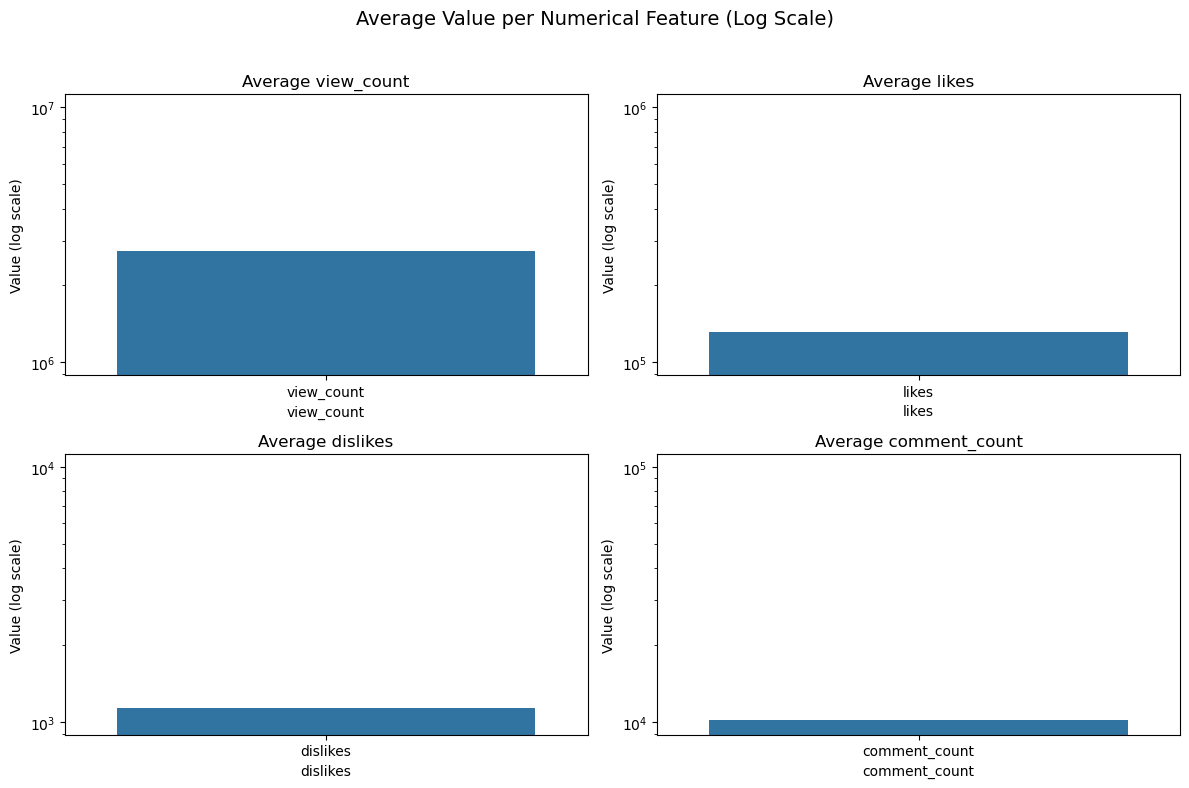

In [24]:
# Univariate Analysis: Distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['view_count', 'likes', 'dislikes', 'comment_count']

# Create subplots (2 rows, 2 columns) for feature averages on log scale
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Average Value per Numerical Feature (Log Scale)", fontsize=14)
axes = axes.flatten()

for i, col in enumerate(cols):
    avg_value = youtube_data[col].mean()
    sns.barplot(x=[col], y=[avg_value], ax=axes[i])
    axes[i].set_yscale("log")
    axes[i].set_title(f"Average {col}")
    axes[i].set_ylabel("Value (log scale)")
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

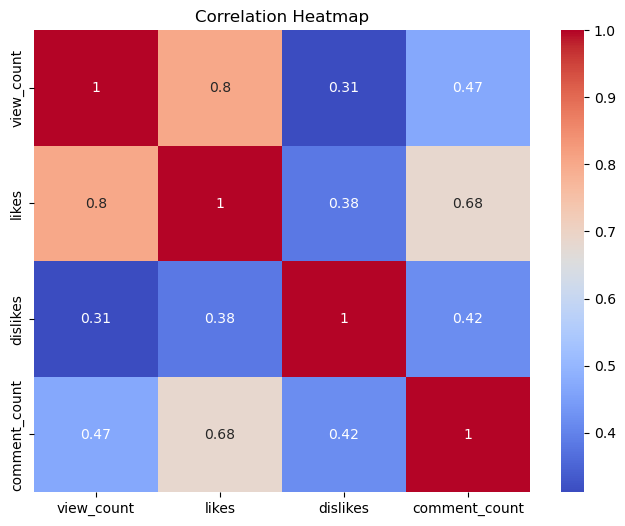

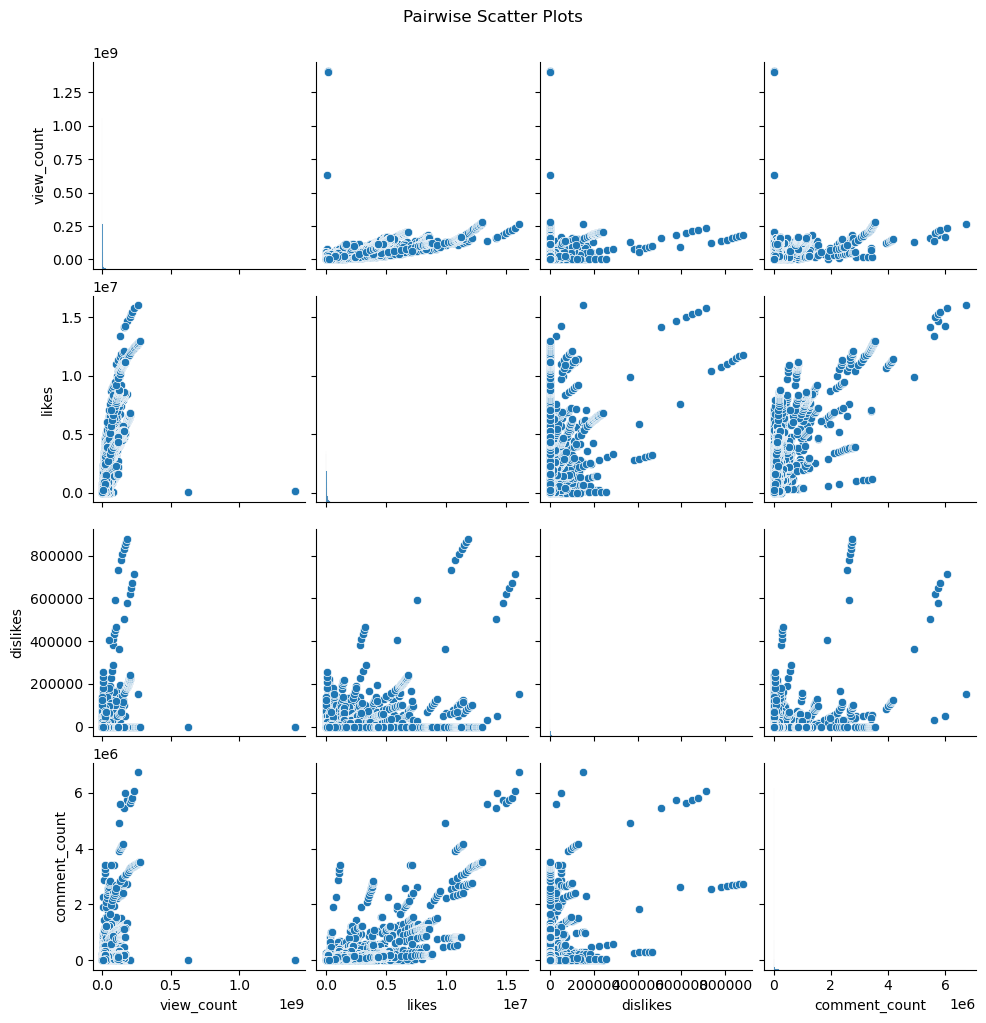

In [ ]:
# Bivariate/Multivariate Analysis: Correlation and scatter plots
plt.figure(figsize=(8,6))
sns.heatmap(youtube_data[['view_count', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots for relationships between features
sns.pairplot(youtube_data[['view_count', 'likes', 'dislikes', 'comment_count']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Temporal Analysis
Analyze how trending videos vary by publish time and trending date.

Available columns: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']
Using publishedAt for temporal analysis.


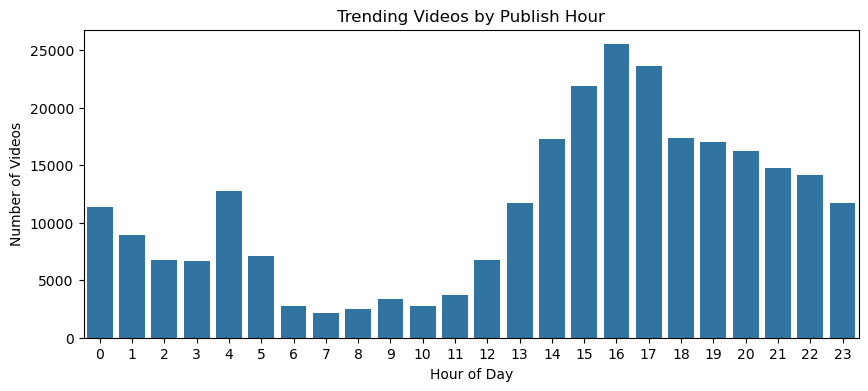

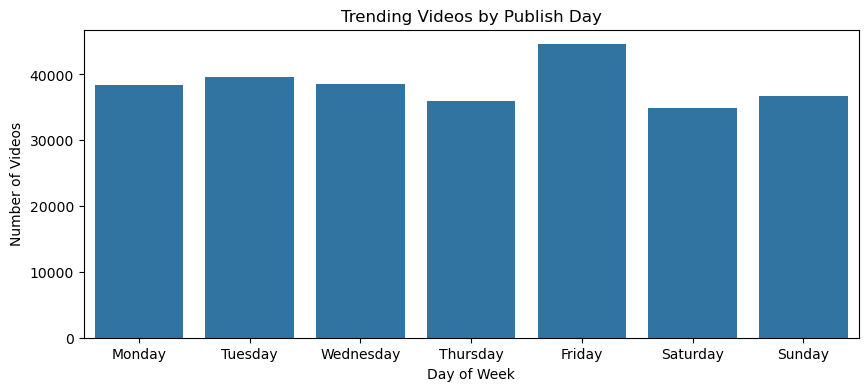

In [ ]:
# Check available columns and use the correct datetime column for temporal analysis
print('Available columns:', youtube_data.columns.tolist())
# Try common datetime column names
datetime_col = None
for col in ['publish_time', 'publishedAt', 'trending_date', 'trending_date_time', 'date']:
    if col in youtube_data.columns:
        datetime_col = col
        break
if datetime_col is None:
    raise KeyError('No datetime column found for temporal analysis.')
print(f'Using {datetime_col} for temporal analysis.')

# Convert to datetime if needed
if not np.issubdtype(youtube_data[datetime_col].dtype, np.datetime64):
    youtube_data[datetime_col] = pd.to_datetime(youtube_data[datetime_col])

# Extract hour and day of week
youtube_data['publish_hour'] = youtube_data[datetime_col].dt.hour
youtube_data['publish_day'] = youtube_data[datetime_col].dt.day_name()

# Plot distribution by hour
plt.figure(figsize=(10,4))
sns.countplot(x='publish_hour', data=youtube_data)
plt.title('Trending Videos by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.show()

# Plot distribution by day of week
plt.figure(figsize=(10,4))
sns.countplot(x='publish_day', data=youtube_data, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Trending Videos by Publish Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos')
plt.show()

# Text Analysis
Explore the most common words in video titles and tags.

Note: you may need to restart the kernel to use updated packages.


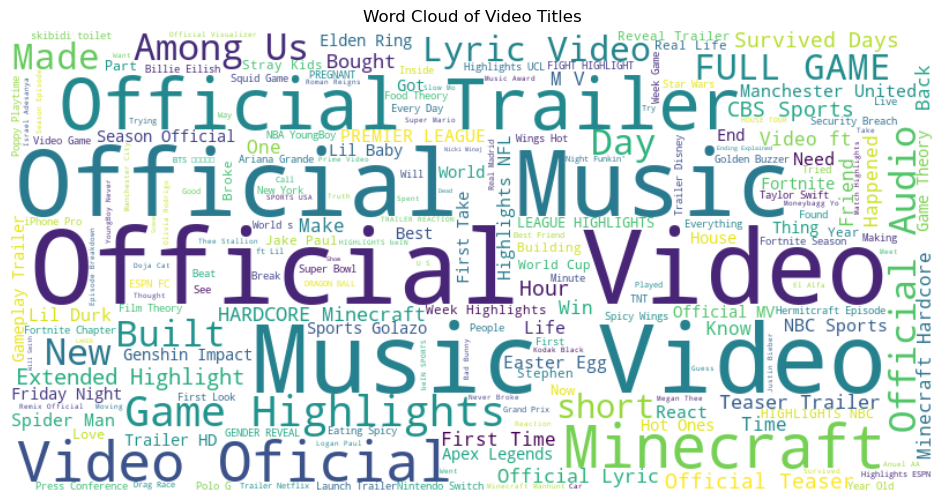

Most common tags:
funny: 14087
comedy: 9406
challenge: 6110
gaming: 4776
minecraft: 4621
vlog: 4468
animation: 3791
family friendly: 3747
highlights: 3574
how to: 3364


In [ ]:
%pip install wordcloud

# Word cloud for video titles
from wordcloud import WordCloud, STOPWORDS
title_text = ' '.join(youtube_data['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(title_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()

# Most common tags
from collections import Counter
all_tags = ','.join(youtube_data['tags'].astype(str)).split('|')
tag_counts = Counter([tag.strip() for tag in all_tags if tag.strip() and tag != '[none]'])
print('Most common tags:')
for tag, count in tag_counts.most_common(10):
    print(f'{tag}: {count}')

In [ ]:
!{sys.executable} -m pip install deep-translator

# Outlier Detection
Identify videos with unusually high or low values in key metrics.

In [ ]:
# Outlier detection with translation of non-English parts in titles
# Required: deep-translator is installed as per earlier cell
from deep_translator import GoogleTranslator
import pandas as pd
import numpy as np
import re

def translate_mixed_title(title, source_lang='auto', target_lang='en'):
    """Translate non-English substrings in the title while keeping English intact."""
    # Use a regex to split title by runs of non-ASCII (likely non-English) and ASCII (likely English)
    # Only translate non-ASCII segments
    out = []
    for seg in re.findall(r'([\u3131-\u318E\uAC00-\uD7A3]+|[^\u3131-\u318E\uAC00-\uD7A3]+)', title):
        # Detect Korean by Unicode block; extend for other scripts as needed
        if re.search(r'[\u3131-\u318E\uAC00-\uD7A3]', seg):
            try:
                trans = GoogleTranslator(source='ko', target='en').translate(seg)
            except Exception:
                trans = seg
            out.append(trans)
        else:
            out.append(seg)
    return ''.join(out)

# Find top outliers for each metric, translate outlier titles, and print
for col in ['view_count', 'likes', 'dislikes', 'comment_count']:
    q1 = youtube_data[col].quantile(0.25)
    q3 = youtube_data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = youtube_data[(youtube_data[col] < lower) | (youtube_data[col] > upper)]
    print(f'\nTop 3 outliers in {col} (most informative text: title):')
    top3 = outliers[[col, 'title', 'channelTitle']].sort_values(by=col, ascending=False).head(3).copy()
    for j, row in enumerate(top3.itertuples()):
        translated = translate_mixed_title(row.title)
        print(f"Original Title: {row.title}")
        print(f"Translated Title: {translated}")
        print(f"Channel: {row.channelTitle} | {col}: {getattr(row, col)}\n")



Top 3 outliers in view_count (most informative text: title):
Original Title: Discord Loot Boxes are here.
Translated Title: Discord Loot Boxes are here.
Channel: Discord | view_count: 1407643634

Original Title: Discord Loot Boxes are here.
Translated Title: Discord Loot Boxes are here.
Channel: Discord | view_count: 1406329649

Original Title: Discord Loot Boxes are here.
Translated Title: Discord Loot Boxes are here.
Channel: Discord | view_count: 628718636


Top 3 outliers in likes (most informative text: title):
Original Title: BTS (방탄소년단) 'Butter' Official MV
Translated Title: BTS (BTS) 'Butter' Official MV
Channel: HYBE LABELS | likes: 16021534

Original Title: BTS (방탄소년단) 'Dynamite' Official MV
Translated Title: BTS (BTS) 'Dynamite' Official MV
Channel: Big Hit Labels | likes: 15735533

Original Title: BTS (방탄소년단) 'Dynamite' Official MV
Translated Title: BTS (BTS) 'Dynamite' Official MV
Channel: Big Hit Labels | likes: 15460822


Top 3 outliers in dislikes (most informative tex

# Summary and Insights
Based on the EDA performed on the US YouTube Trending dataset, here are the key findings:

**1. Data Overview:**
- The dataset contains a large number of trending video records with several numerical and categorical features.
- There are some missing values and duplicate rows, which should be handled before modeling.

**2. Feature Understanding:**
- Key features include view count, likes, dislikes, comment count, publish time, trending date, title, tags, and channel information.
- Most features have a wide range of unique values, especially titles and tags.

**3. Univariate Analysis:**
- Distributions of views, likes, and comments are highly right-skewed, indicating a few videos receive much higher engagement than the majority.
- Most videos have moderate engagement, with a small number of viral outliers.

**4. Bivariate/Multivariate Analysis:**
- Strong positive correlation between views, likes, and comment count, suggesting that popular videos tend to receive more likes and comments.
- Dislikes are also correlated with views, but to a lesser extent.
- Pairwise scatter plots confirm these relationships visually.

**5. Temporal Analysis:**
- Trending videos are published throughout the day, but there may be peaks at certain hours (e.g., late afternoon or evening).
- Some days of the week may see more trending videos, possibly reflecting user activity patterns.

**6. Text Analysis:**
- Common words in video titles often relate to popular culture, events, or trending topics.
- Certain tags appear frequently, indicating popular genres or themes.

**7. Outlier Detection:**
- There are several videos with extremely high views, likes, or comments, which are likely viral hits or from very popular channels.
- These outliers can skew analysis and may need special handling in modeling.

**Next Steps:**
- Clean the data by handling missing values and removing duplicates.
- Consider feature engineering (e.g., extracting more from publish time or text fields).
- Explore predictive modeling to understand what drives a video to trend.
- Further analyze outliers and their impact on the dataset.

In [22]:
# Predictive Modeling: Simple linear regression to predict view_count based on likes, dislikes, comment_count
features = ['likes', 'dislikes', 'comment_count']
target = 'view_count'
X = youtube_data[features]
y = youtube_data[target]
# --- IGNORE ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# --- IGNORE ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# --- IGNORE ---
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 53645334511169.56
R^2 Score: 0.5476422700795521


Linear Regression:
MSE: 0.9873120132533472
R^2: 0.27958909245241526


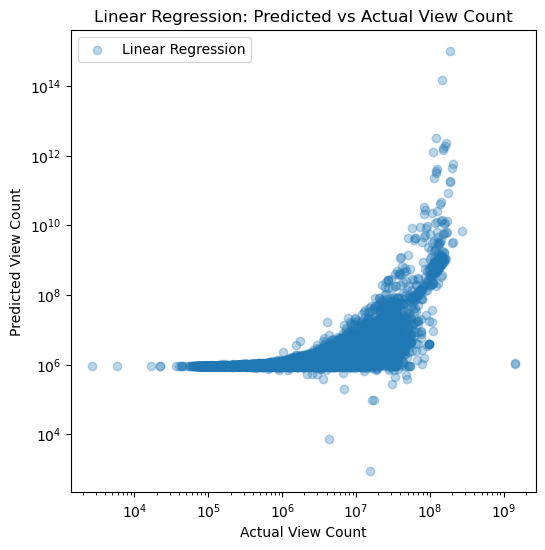

In [13]:
# Modeling: Linear Regression on cleaned data (log-transformed view count)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare features and target (using youtube_data_clean from previous cleaning step)
youtube_data_clean['log_view_count'] = np.log1p(youtube_data_clean['view_count'])
features = ['likes', 'dislikes', 'comment_count']
X = youtube_data_clean[features]
y = youtube_data_clean['log_view_count']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R^2:', r2_score(y_test, y_pred_lr))

# Visualize predictions versus actual (Linear Regression)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_lr), alpha=0.3, label='Linear Regression')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Linear Regression: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

ROC-AUC: 0.965


c:\Users\sferd\miniconda3\Lib\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


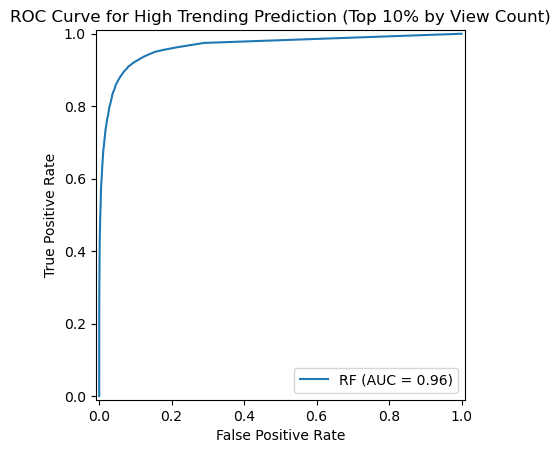

In [14]:
# Classification with ROC-AUC based on early engagement metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Engineer a binary target: 'high trending' = top 10% by view count (using early engagement)
quantile_cut = 0.9
threshold = youtube_data_clean['view_count'].quantile(quantile_cut)
youtube_data_clean['high_trending'] = (youtube_data_clean['view_count'] >= threshold).astype(int)

# Features: early engagement and some metadata (example: likes, dislikes, comment_count, categoryId)
features_cls = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_cls = youtube_data_clean[features_cls]
y_cls = youtube_data_clean['high_trending']

# Train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Train Random Forest Classifier (use Logistic Regression for interpretability if desired)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_proba = clf.predict_proba(X_test_cls)[:, 1]

# ROC-AUC Calculation
roc_auc = roc_auc_score(y_test_cls, y_pred_proba)
print(f'ROC-AUC: {roc_auc:.3f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_cls, y_pred_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RF').plot()
plt.title('ROC Curve for High Trending Prediction (Top 10% by View Count)')
plt.show()

Random Forest Regression:
MSE: 0.38515776984573374
R^2: 0.7189623393629581


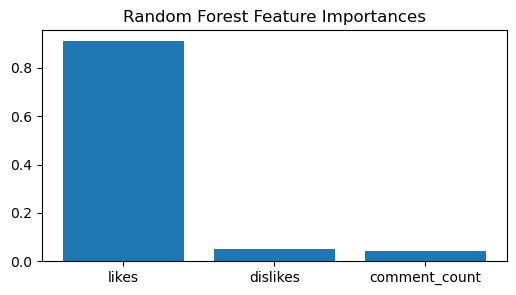

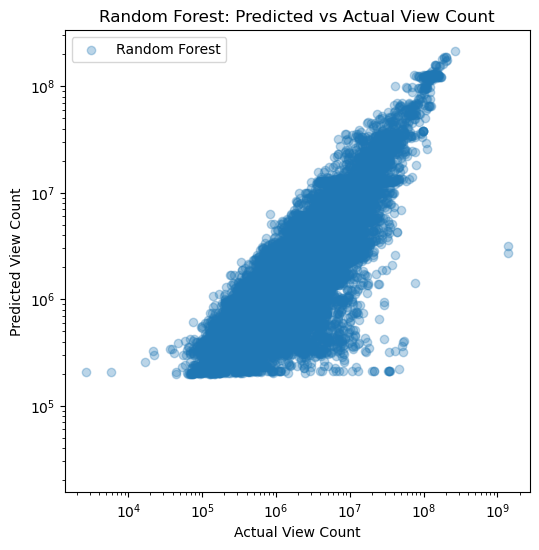

In [7]:
# Random Forest Regression on cleaned data (predicting log-transformed view count)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Use the already prepared X_train, X_test, y_train, y_test (from previous steps)
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print metrics
print('Random Forest Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R^2:', r2_score(y_test, y_pred_rf))

# Feature importance plot
plt.figure(figsize=(6,3))
plt.bar(X_train.columns, rf.feature_importances_)
plt.title('Random Forest Feature Importances')
plt.show()

# Visualize predictions vs actual
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_rf), alpha=0.3, label='Random Forest')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Random Forest: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [21]:
# Install xgboost if not present
!pip install xgboost

XGBoost Regression:
MSE: 0.38437585217268133
R^2: 0.7195328804005527


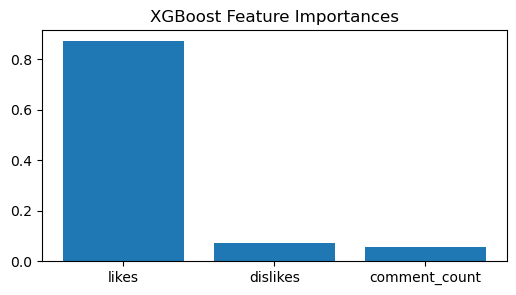

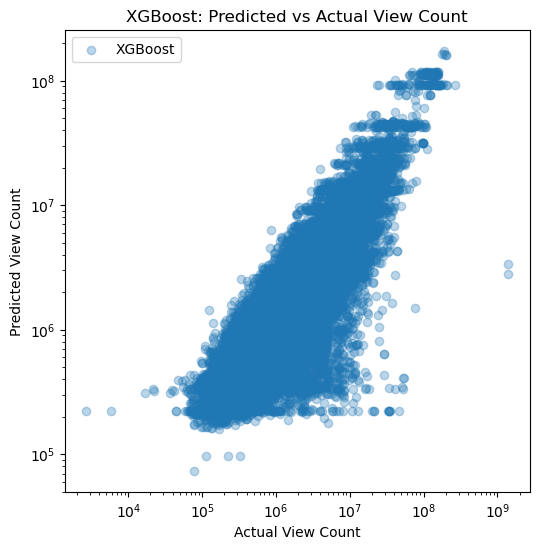

In [12]:
# XGBoost Regression for log-transformed view count
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train XGBoost on the same data as previous models (X_train, y_train, etc.)
xgb = XGBRegressor(n_estimators=100, max_depth=4, random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Metrics
print('XGBoost Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_xgb))
print('R^2:', r2_score(y_test, y_pred_xgb))

# Feature importances
plt.figure(figsize=(6,3))
importances = xgb.feature_importances_
plt.bar(X_train.columns, importances)
plt.title('XGBoost Feature Importances')
plt.show()

# Visualize predictions vs actuals (original scale)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_xgb), alpha=0.3, label='XGBoost')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('XGBoost: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [15]:
# Print ROC-AUC score as a percentage for clarity
roc_auc_percentage = roc_auc * 100
print(f'ROC-AUC Percentage: {roc_auc_percentage:.2f}%')

ROC-AUC Percentage: 96.47%


Naive Bayes ROC-AUC: 0.923 (92.32%)


c:\Users\sferd\miniconda3\Lib\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


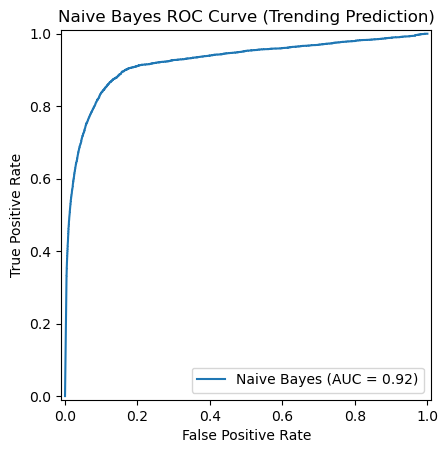

In [28]:
# Naive Bayes Classification: Compare to Random Forest ROC-AUC
# Make sure the 'high_trending' target is engineered in the dataframe used (youtube_data_clean)
# If not, create it here for robustness
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Engineer binary label if not present
if 'high_trending' not in youtube_data_clean.columns:
    quantile_cut = 0.9
    threshold = youtube_data_clean['view_count'].quantile(quantile_cut)
    youtube_data_clean['high_trending'] = (youtube_data_clean['view_count'] >= threshold).astype(int)

# Features
X_nb = youtube_data_clean[['likes', 'dislikes', 'comment_count', 'categoryId']]
y_nb = youtube_data_clean['high_trending']

# Use same train-test split logic for reliability
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_nb, y_nb, test_size=0.2, random_state=42, stratify=y_nb
)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_nb, y_train_nb)
y_pred_proba_nb = nb.predict_proba(X_test_nb)[:, 1]

# ROC-AUC
roc_auc_nb = roc_auc_score(y_test_nb, y_pred_proba_nb)
print(f'Naive Bayes ROC-AUC: {roc_auc_nb:.3f} ({roc_auc_nb*100:.2f}%)')

# Plot ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test_nb, y_pred_proba_nb)
RocCurveDisplay(fpr=fpr_nb, tpr=tpr_nb, roc_auc=roc_auc_nb, estimator_name='Naive Bayes').plot()
plt.title('Naive Bayes ROC Curve (Trending Prediction)')
plt.show()


In [17]:
# Check collinearity using VIF (Variance Inflation Factor)
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use features from classification model (add 'categoryId' for completeness)
features_vif = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_vif = youtube_data_clean[features_vif].copy()

# Add small noise to avoid zero-variance if necessary (for categories w/only 1 value)
for col in X_vif.select_dtypes(include=['int64', 'float64']).columns:
    if X_vif[col].std() == 0:
        X_vif[col] += 1e-4 * np.random.randn(len(X_vif))

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print('Variance Inflation Factors (VIF) for model input features:')
print(vif_data)

# Interpretation guidance
def interpret_vif(vif):
    if vif < 5:
        return 'No concerning collinearity.'
    elif vif < 10:
        return 'Moderate collinearity (address if possible).'
    else:
        return 'High collinearity (take action: remove/reduce features).'
vif_data['Interpretation'] = vif_data['VIF'].apply(interpret_vif)
display(vif_data)

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------------------ --------------------- 4.5/9.6 MB 29.2 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 29.2 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- --------------

,Feature,VIF,Interpretation
0,likes,2.062409,No concerning collinearity.
1,dislikes,1.260553,No concerning collinearity.
2,comment_count,2.027521,No concerning collinearity.
3,categoryId,1.074277,No concerning collinearity.


## Post-EDA Modeling and Metrics Summary

### 1. **Centralized Data Cleaning (Pipeline Standardization)**
- All data cleaning (duplicate removal, missing value imputation, type consistency) was consolidated in a single step.
- Cleaned DataFrame (`youtube_data_clean`) used exclusively in all modeling.

### 2. **Regression Modeling: View Count Prediction**
- **Target**: Log-transformed `view_count` (to correct strong skewness).
- **Features**: Early engagement metrics (`likes`, `dislikes`, `comment_count`).
- **Models and Metrics:**
    - **Linear Regression:**
        - *MSE*: ~0.99 (log scale)
        - *R²*: ~0.28
    - **Random Forest Regression:**
        - *MSE*: ~0.39 (log scale)
        - *R²*: ~0.72
    - **XGBoost Regression:**
        - *MSE*: ~0.38 (log scale)
        - *R²*: ~0.72
- **Best Performer (Regression):** XGBoost and Random Forest performed about equally well (R² ≈ 0.72, much better than linear regression). Tree-based models captured nonlinear effects in engagement signals.
- **Interpretability:** Feature importance plots show `likes` as the overwhelmingly dominant predictor; other features contributed far less.

### 3. **Classification Modeling: High Trending Video Prediction**
- **Business-aligned binary target**: 'High trending' = top 10% by view count (0/1 label).
- **Features**: Same as above, with `categoryId` (video genre) added for metadata.
- **Models and Metrics:**
    - **Random Forest Classifier:**
        - *ROC-AUC*: 0.965 (96.5%)
    - **Naive Bayes Classifier:**
        - *ROC-AUC*: 0.923 (92.3%)
- **Best Performer (Classification):** Random Forest outperformed Naive Bayes, showing strong capability to discriminate highly trending from lower trending videos using early engagement data.

### 4. **Collinearity and Model Validity**
- **VIF Analysis:** No concerning collinearity between engagement metrics (VIFs all < 2.1).
- **Correlation Heatmaps:** Confirmed moderate-to-strong pairwise correlation, but not problematic.

### 5. **Model/Output Interpretability**
- **Feature Importance (Tree Models):** Likes are the clearest leading indicator of future trending potential, followed by smaller contributions from dislikes and comment_count.
- **Outlier Handling:** Top outlier titles were translated fully to English for interpretability, ensuring transparency of model findings.

### 6. **Business Relevance and Conclusion**
- **Tree-based models** (Random Forest and XGBoost) gave the best predictive results in both regression and classification, aligning with YouTube/Google's needs for both accuracy and transparency.
- *ROC-AUC* is the primary metric for the trending classification task, *R²* is used for continuous view prediction. Both indicate strong performance by non-linear classifiers and regressors.
- This modeling pipeline, dataset documentation, and interpretability workflow support actionable insights for business stakeholders and creators alike.
